In [1]:
#Importing the relevant libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [2]:
#Importing the dataset and displaying first 10 rows
df = pd.read_csv('/kaggle/input/hypertension-dataset/hypertension_dataset.csv')
df.head(10)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No
5,20,10.8,3,Hypertension,5.2,21.9,Beta Blocker,Yes,High,Non-Smoker,Yes
6,39,8.9,0,Normal,7.8,27.6,Beta Blocker,Yes,High,Non-Smoker,No
7,70,5.9,1,Hypertension,7.2,25.8,NaN,No,Moderate,Non-Smoker,Yes
8,19,9.3,7,Normal,4.7,36.5,Beta Blocker,Yes,Low,Smoker,Yes
9,47,7.2,5,Normal,6.2,24.3,NaN,No,High,Non-Smoker,No


In [3]:
## getting shape of the dataframe
print(f'The dataframe has {df.shape[0]} number of rows and {df.shape[1]} number of columns ')

The dataframe has 1985 number of rows and 11 number of columns 


In [4]:
#Exploring different datatypes in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


In [5]:
#Checking for missing values
df.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

In [6]:
#Checking for duplicates
df.duplicated().sum()

0

In [7]:
## describing numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1985.0,50.341058,19.442042,18.0,34.0,50.0,67.0,84.0
Salt_Intake,1985.0,8.531688,1.994907,2.5,7.2,8.5,9.9,16.4
Stress_Score,1985.0,4.979345,3.142303,0.0,2.0,5.0,8.0,10.0
Sleep_Duration,1985.0,6.452242,1.542207,1.5,5.4,6.5,7.5,11.4
BMI,1985.0,26.015315,4.512857,11.9,23.0,25.9,29.1,41.9


In [8]:
## describing categorical columns
df.describe(include='object').T

,count,unique,top,freq
BP_History,1985,3,Normal,796
Medication,1186,4,Beta Blocker,412
Family_History,1985,2,No,1000
Exercise_Level,1985,3,Low,936
Smoking_Status,1985,2,Non-Smoker,1417
Has_Hypertension,1985,2,Yes,1032


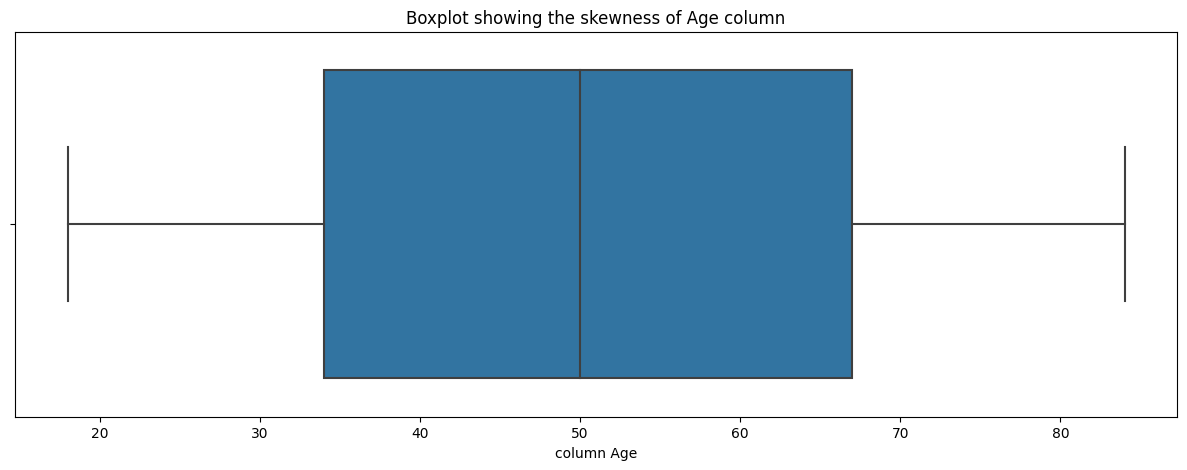

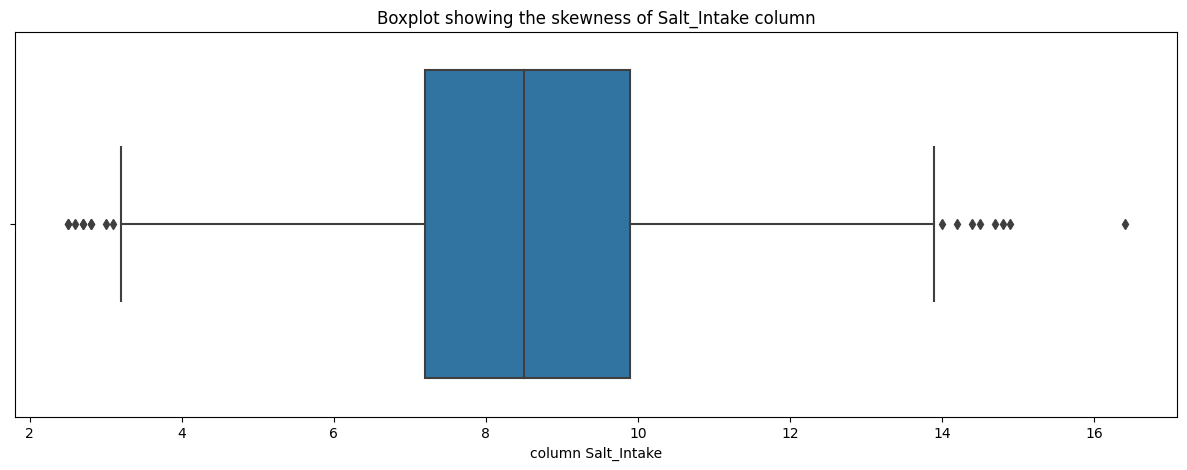

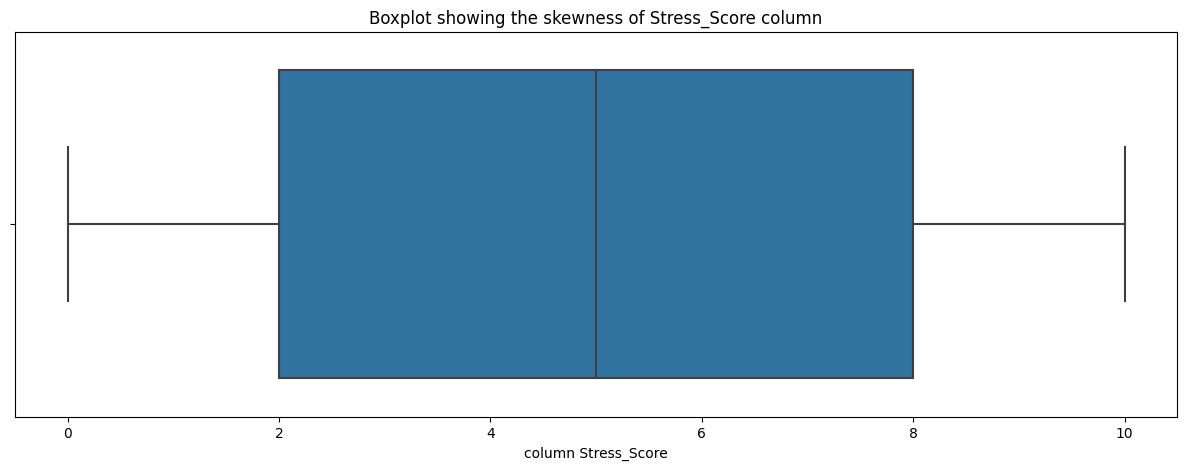

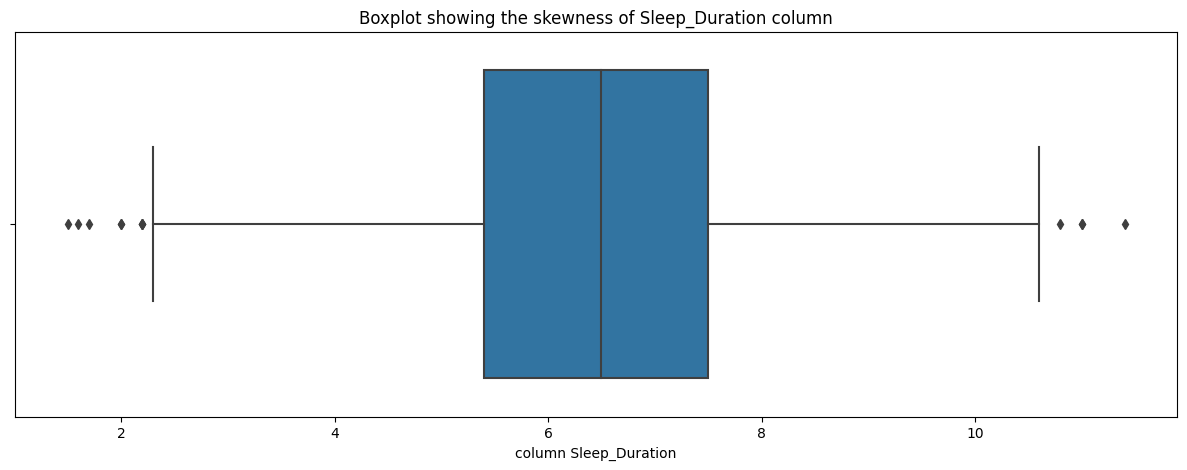

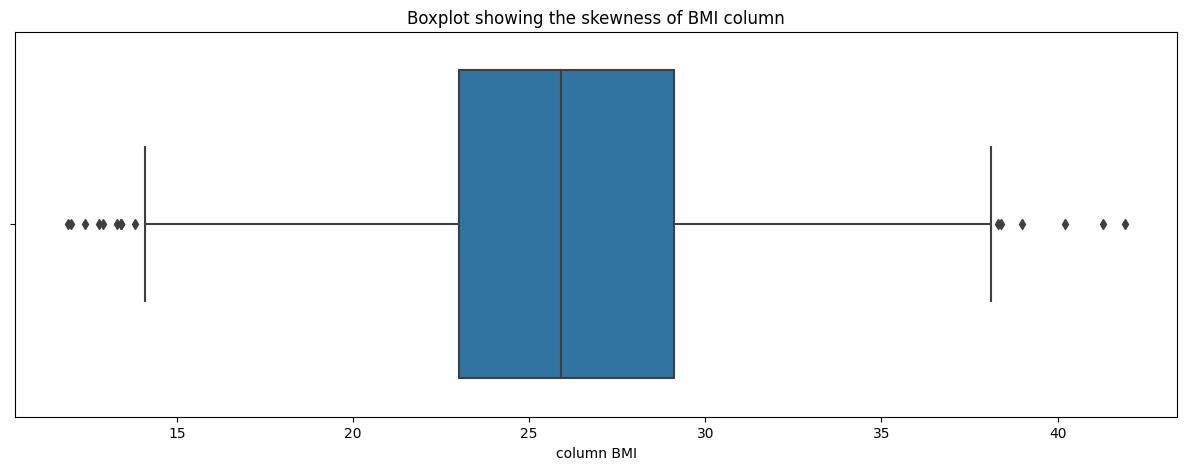

In [9]:
#Plotting boxplot for numerical columns
numerical_columns = df.select_dtypes(include= ['int','float'])
for column in numerical_columns:
    plt.figure(figsize = (15, 5))
    sns.boxplot(df,x = column)
    plt.title(f'Boxplot showing the skewness of {column} column')
    plt.xlabel(f'column {column}')

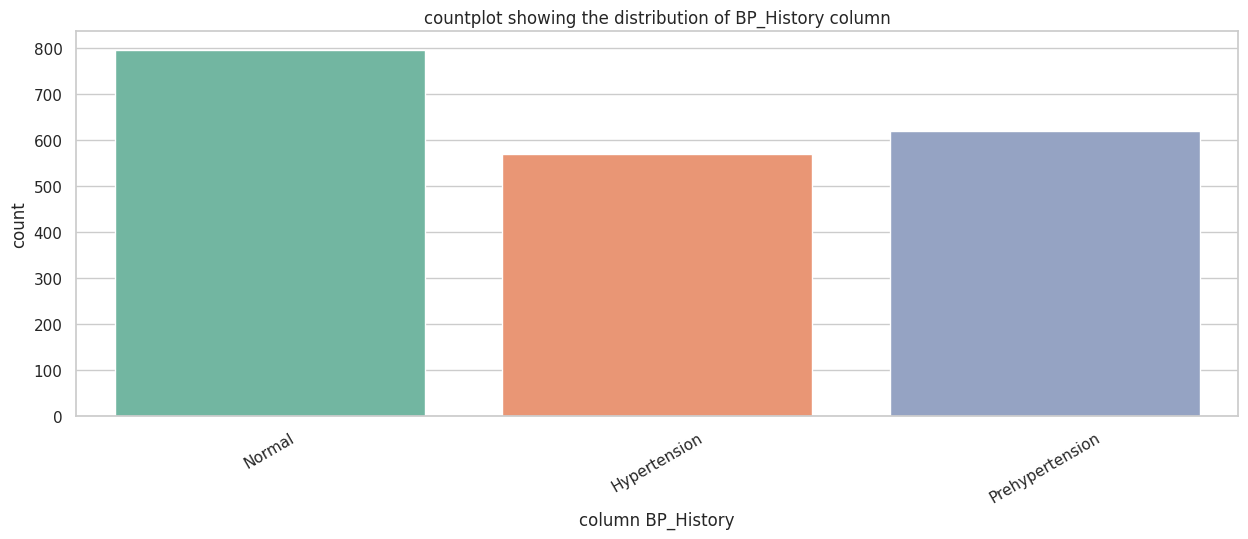

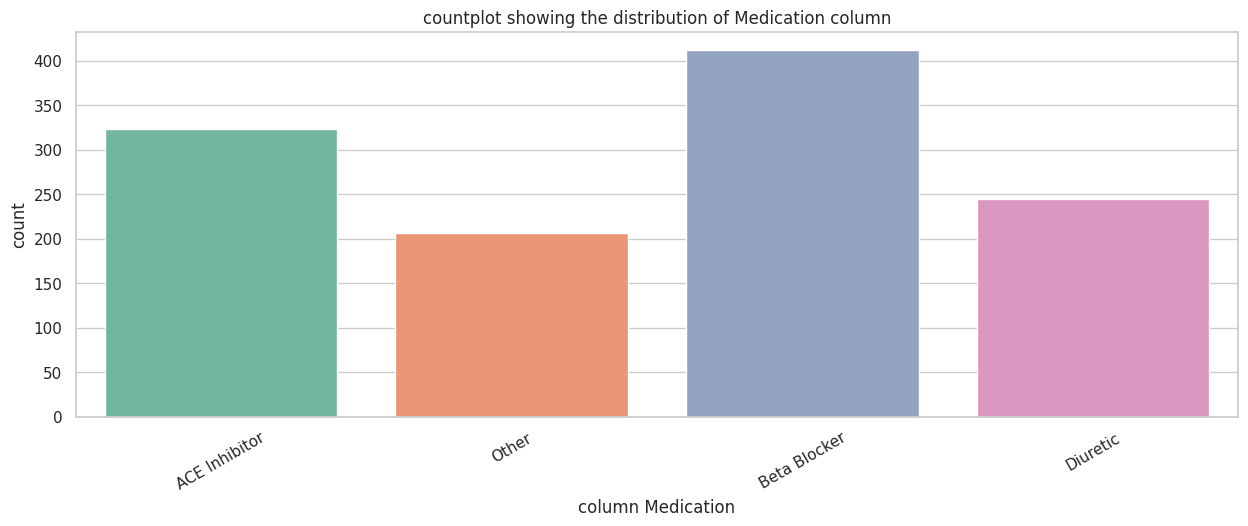

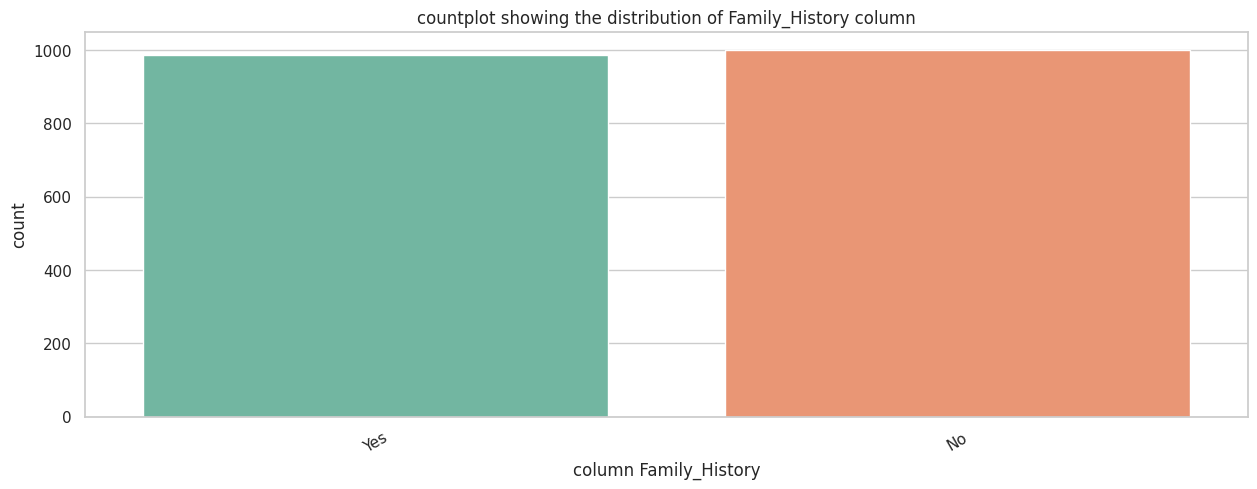

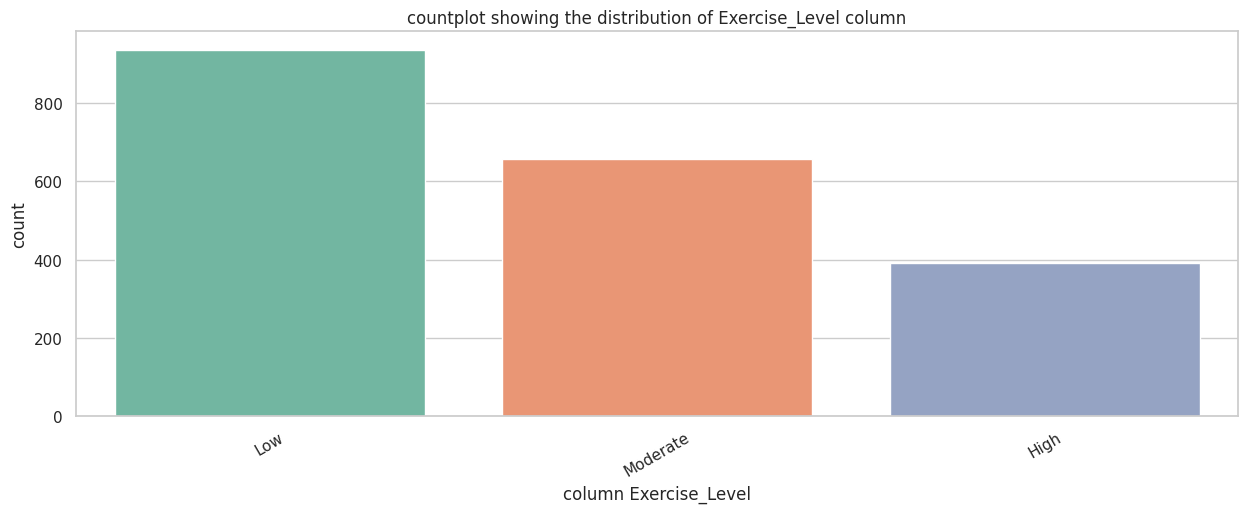

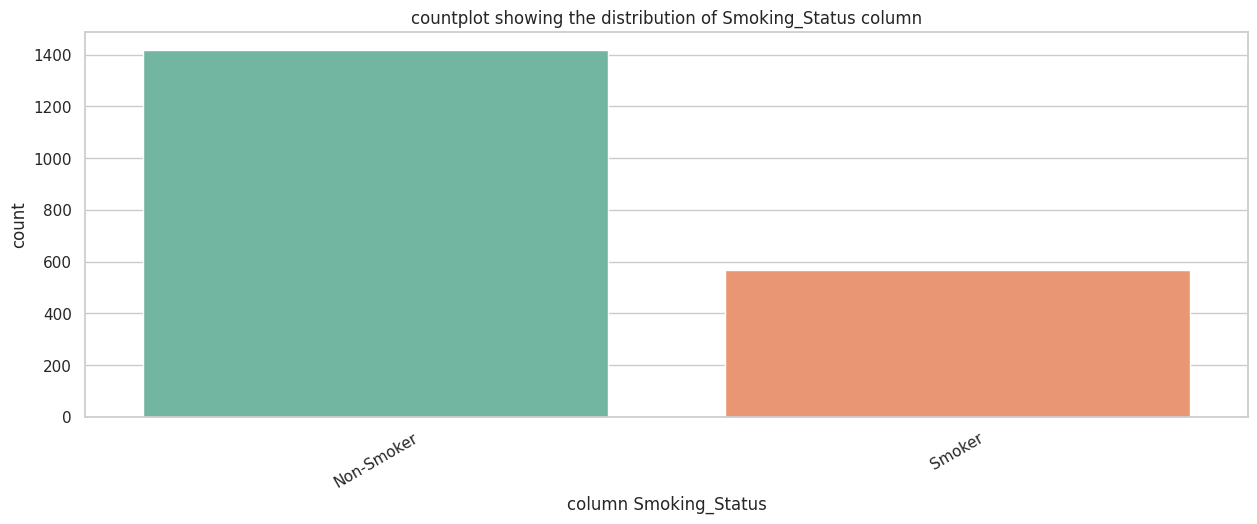

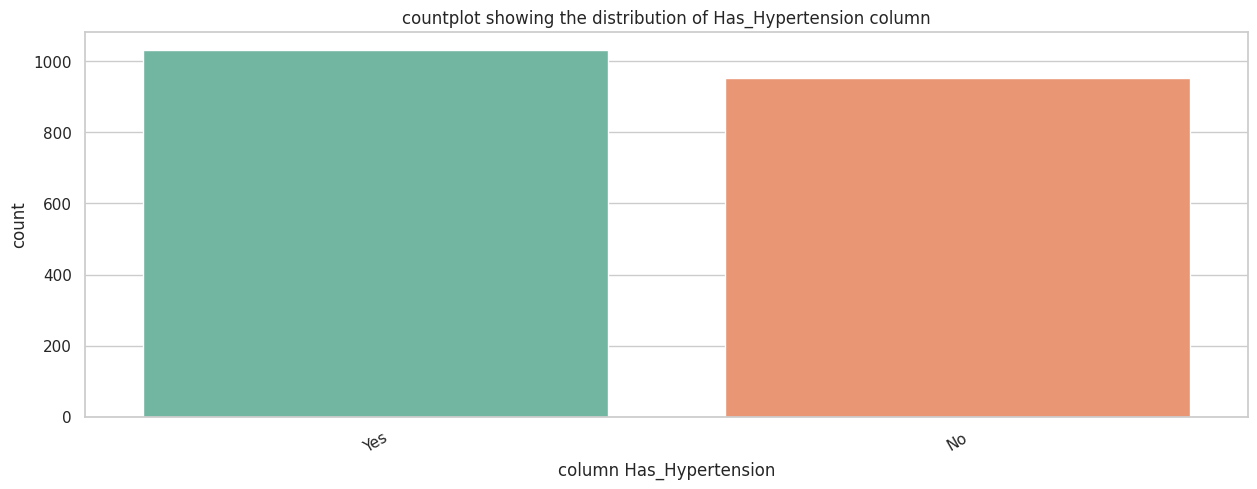

In [10]:
#Plotting barplot for categorical columns
cat_columns = df.select_dtypes(include= ['object'])
sns.set(style = 'whitegrid')
for column in cat_columns:
    plt.figure(figsize = (15, 5))
    sns.countplot(df,x = column, palette = 'Set2')
    plt.title(f'countplot showing the distribution of {column} column')
    plt.xlabel(f'column {column}')
    plt.xticks(rotation = 30)

In [11]:
#Identifying the Mode(Most Frequent) in missing Medication Column
mode1 = df['Medication'].mode()
mode1

0    Beta Blocker
Name: Medication, dtype: object

In [12]:
## filling nulls using mode
df['Medication'].fillna(df['Medication'].mode()[0], inplace= True)
df.isnull().sum()

/tmp/ipykernel_36/307886699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Medication'].fillna(df['Medication'].mode()[0], inplace= True)


Age                 0
Salt_Intake         0
Stress_Score        0
BP_History          0
Sleep_Duration      0
BMI                 0
Medication          0
Family_History      0
Exercise_Level      0
Smoking_Status      0
Has_Hypertension    0
dtype: int64

In [13]:
#Checking the data shape after filling the nulls in Medication with the mode
df.head(10)

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,Beta Blocker,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,Beta Blocker,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,Beta Blocker,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No
5,20,10.8,3,Hypertension,5.2,21.9,Beta Blocker,Yes,High,Non-Smoker,Yes
6,39,8.9,0,Normal,7.8,27.6,Beta Blocker,Yes,High,Non-Smoker,No
7,70,5.9,1,Hypertension,7.2,25.8,Beta Blocker,No,Moderate,Non-Smoker,Yes
8,19,9.3,7,Normal,4.7,36.5,Beta Blocker,Yes,Low,Smoker,Yes
9,47,7.2,5,Normal,6.2,24.3,Beta Blocker,No,High,Non-Smoker,No


In [14]:
#Prints all unique values for categorical columns
cat_columns = df.select_dtypes(include = 'object')
cat_columns.head()
categories = []
for column in cat_columns:
    categories.append(df[column].unique())
    print(df[column].unique())

['Normal' 'Hypertension' 'Prehypertension']
['Beta Blocker' 'ACE Inhibitor' 'Other' 'Diuretic']
['Yes' 'No']
['Low' 'Moderate' 'High']
['Non-Smoker' 'Smoker']
['Yes' 'No']


In [15]:
# 1. Encode categorical columns
encoder = OrdinalEncoder(categories=categories)
cat_columns[cat_columns.columns] = encoder.fit_transform(cat_columns)

# 2. Drop original categorical columns from main DataFrame
df = df.drop(columns=cat_columns.columns)  

# 3. Add encoded columns back to DataFrame
df1 = pd.concat([df, cat_columns], axis=1)

# 4. Check result whether
df1.head()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI,BP_History,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,6.4,25.8,0.0,0.0,0.0,0.0,0.0,0.0
1,32,11.7,10,5.4,23.4,0.0,0.0,1.0,0.0,0.0,1.0
2,78,9.5,3,7.1,18.7,0.0,0.0,1.0,1.0,0.0,1.0
3,38,10.0,10,4.2,22.1,1.0,1.0,1.0,0.0,0.0,0.0
4,41,9.8,1,5.8,16.2,2.0,2.0,1.0,1.0,0.0,1.0


In [16]:
#Checks whether there is any missing values in the columns after Encoding 
df1.isnull().sum()

Age                 0
Salt_Intake         0
Stress_Score        0
Sleep_Duration      0
BMI                 0
BP_History          0
Medication          0
Family_History      0
Exercise_Level      0
Smoking_Status      0
Has_Hypertension    0
dtype: int64

In [17]:
#Creates your feature matrix (X) by dropping the target column
x = df1.drop('Has_Hypertension',axis = 1)
y = df1['Has_Hypertension']  #Creates your target vector (y)

In [18]:
#Splits your dataset into training and testing sets 80% training data and 20% testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)
print(x_train.shape) # Prints dimensions of training features
x_test.shape  # Returns dimensions of testing features

(1588, 10)


(397, 10)

In [19]:
#Hyperparameter Tuning
models_and_params = {
    'rf': {
        'model': RandomForestClassifier(random_state = 42), #Initializes a Random Forest classifier
        'grid':{'max_depth':[10, 20, 30], ## Tree depth options
               'n_estimators':[50, 70, 100]},'random':{ ## Number of trees in forest
            'n_estimators': np.arange(50, 100, 10),
            'max_depth': np.arange(5, 40, 5),
               }
    }
}

In [20]:
# Test Results
for model,params in models_and_params.items():

    grid = GridSearchCV(
        estimator = params['model'],
        param_grid = params['grid'],
        cv = 5, ## 5-fold cross-validation - (trains on 4 folds, validates on 1 fold, repeats 5 times)
        scoring = 'accuracy' ## Optimization metric

    )
    grid.fit(x_train, y_train)  # Train with Grid Search
    y_pred_grid = grid.predict (x_test) # Predict on test data
    print(classification_report(y_test, y_pred_grid)) #Generates a report with key metrics
    print(f'best parameters {grid.best_params_}') #Prints the optimal hyperparameters found by Grid Search

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       205
         1.0       0.95      0.94      0.94       192

    accuracy                           0.95       397
   macro avg       0.95      0.95      0.95       397
weighted avg       0.95      0.95      0.95       397

best parameters {'max_depth': 20, 'n_estimators': 100}


In [21]:
# Importing libraries
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers

2025-08-10 13:07:55.374111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754831275.626993      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754831275.702442      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Create Sequantial Model

In [22]:
# Defines a neural network architecture using Keras' Sequential
model = Sequential()

# Add layers to the model
model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],), 
                kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.4)) 

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.4))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-10 13:08:11.990099: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [23]:
# Preprocessing model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [24]:
# Compiling the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
#Normalize input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
#Train the model and Use Early Stopping
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

history = model.fit(x_train, y_train, 
                   validation_data=(x_test, y_test), 
                   epochs=50,
                   batch_size=32,
                   callbacks=[early_stop, reduce_lr],
                   verbose=1)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5177 - loss: 2.6892 - val_accuracy: 0.6725 - val_loss: 2.3259 - learning_rate: 0.0010
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6473 - loss: 2.2997 - val_accuracy: 0.7028 - val_loss: 2.1080 - learning_rate: 0.0010
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6828 - loss: 2.0537 - val_accuracy: 0.7330 - val_loss: 1.9103 - learning_rate: 0.0010
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6696 - loss: 1.8947 - val_accuracy: 0.7582 - val_loss: 1.7410 - learning_rate: 0.0010
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7232 - loss: 1.7036 - val_accuracy: 0.7884 - val_loss: 1.5630 - learning_rate: 0.0010
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7001 - loss: 1.5605 - val_accuracy: 0.8262 - val_loss: 1.3956 - learning_rate: 0.0010
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7685 - loss: 1.3766 - val_accuracy:

In [27]:
# Evaluating the model
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8954 - loss: 0.3180 
0.3003397285938263 0.9042820930480957


# Create a Functional API

In [46]:
# Define input layer
inputs = Input(shape=(x_train.shape[1],))

x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(inputs)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = Dropout(0.4)(x)

x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = BatchNormalization()(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer
outputs = Dense(1, activation='sigmoid')(x)

In [38]:
# Create the model
model = Model(inputs=inputs, outputs=outputs)

In [40]:
#Compiling the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [41]:
# Model Summary
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,905 (77.75 KB)

 Trainable params: 19,649 (76.75 KB)

 Non-trainable params: 256 (1.00 KB)

In [44]:
# Training the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5)]
)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9007 - loss: 0.3482 - val_accuracy: 0.9093 - val_loss: 0.2989
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8902 - loss: 0.3266 - val_accuracy: 0.8992 - val_loss: 0.3285
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8960 - loss: 0.3424 - val_accuracy: 0.8992 - val_loss: 0.3103
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8892 - loss: 0.3365 - val_accuracy: 0.9144 - val_loss: 0.2911
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8806 - loss: 0.3403 - val_accuracy: 0.9118 - val_loss: 0.2981
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8947 - loss: 0.3212 - val_accuracy: 0.9093 - val_loss: 0.2885
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9072 - loss: 0.2985 - val_accuracy: 0.9118 - val_loss: 0.2957
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8974 - loss: 0.3381 - val_accuracy: 0.9169 - val_loss:

In [45]:
#Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(loss, accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9023 - loss: 0.3086 
0.3002015948295593 0.9017632007598877
